In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Question1

In [ ]:
os.chdir('/content/sample_data')

In [ ]:
%cd /content/sample_data

/content/sample_data


Question2

In [ ]:
src3 = '/content/drive/MyDrive/intro-dl/afhq/new_folder/new.txt'
dst3 = '/content/drive/MyDrive/intro-dl/afhq/new_folder/new3.txt'

In [ ]:
shutil.copy(src3,dst3)

'/content/drive/MyDrive/intro-dl/afhq/new_folder/new3.txt'

In [ ]:
!ls -l

total 12
drwx------ 2 root root 4096 Dec 27 10:20 new_folder
-rw------- 1 root root    0 Dec 27 10:18 new.txt
drwx------ 2 root root 4096 Dec 27 04:34 train
drwx------ 2 root root 4096 Dec 27 04:37 val


Basic Pytorch

In [ ]:
import torch

In [ ]:
##PyTorch is an open-source deep learning framework that’s known for its flexibility and ease-of-use.
##This is enabled in part by its compatibility with the popular Python high-level programming language favored by machine learning developers and data scientists.

Question3

In [ ]:
matrix1 = torch.tensor([[1., 2.], [3., 4.]])
print(matrix1)

tensor([[1., 2.],
        [3., 4.]])


In [ ]:
matrix2 = torch.tensor([[5., 6.], [7., 8.]])
print(matrix2)

tensor([[5., 6.],
        [7., 8.]])


In [ ]:
torch.linalg.matrix_norm(torch.div(matrix1, matrix2))

tensor(0.7647)

In [ ]:
torch.linalg.matrix_norm(matrix1)

tensor(5.4772)

In [ ]:
torch.linalg.matrix_norm(matrix2)

tensor(13.1909)

Question4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [ ]:
#딥러닝 모델 설계할 때 활용하는 장비 확인
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')

print('Using PyTorch version:', torch.__version__, ' Device:', DEVICE)
#Pytorch 코드가 자동적으로 사용 가능한 하드웨어에 적응
#GPU가 가능하면 GPU, 그렇지 않으면 CPU를 사용

Using PyTorch version: 2.1.0+cu121  Device: cuda


In [ ]:
BATCH_SIZE = 32
#머신러닝 모델의 학습 중 한 번에 처리되는 데이터 샘플의 수
EPOCHS = 10
#학습 중에 전체 데이터셋이 처리되는 횟수

In [ ]:
#MNIST 데이터셋을 학습용으로 다운로드하고 불러오기
train_dataset = datasets.MNIST(root = "../data/MNIST",
                               train = True,
                               download = True,
                               transform = transforms.ToTensor())
#MNIST 데이터셋을 테스트용으로 불러오기
test_dataset = datasets.MNIST(root = "../data/MNIST",
                              train = False,
                              transform = transforms.ToTensor())
#학습 데이터를 미니배치로 나누기 위한 DataLoader 설정
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)
#테스트 데이터를 미니배치로 나누기 위한 DataLoader 설정
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = False)

In [ ]:
##The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.

In [ ]:
for (X_train, y_train) in train_loader:
  #첫 번째 미니배치를 가져와서 각 구성 요소의 크기와 유형 출력
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


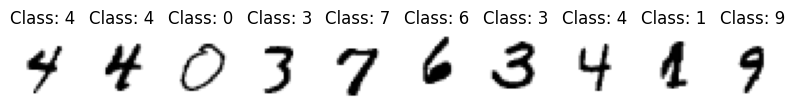

In [ ]:
#이미지를 표시할 크기 설정
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))
#처음 10개의 이미지를 시각화
for i in range(10):
  #1행 10열의 서브플롯 중 현재 서브플롯 선택
    plt.subplot(1, 10, i + 1)
    #축 제거
    plt.axis('off')
    #이미지를 NumPy 배열로 변환하고 28x28 크기로 재구성하여 회색조로 표시
    plt.imshow(X_train[i, :, :, :].numpy().reshape(28, 28), cmap = "gray_r")
    #이미지에 해당하는 클래스(레이블)를 제목으로 표
    plt.title('Class: ' + str(y_train[i].item()))

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
      #입력 데이터를 2D 텐서로 변환
        x = x.view(-1, 28 * 28)
        #첫 번째 fully connected layer 적용
        x = self.fc1(x)
        x = F.sigmoid(x) #활성화 함수로 시그모이드 사용
          #두 번째 fully connected layer 적용
        x = self.fc2(x)
        x = F.sigmoid(x) #활성화 함수로 시그모이드 사용
        #세 번째 fully connected layer 적용
        x = self.fc3(x)
        #로그 소프트맥스 활성화 함수 적용
        x = F.log_softmax(x, dim = 1)
        return x

In [ ]:
#Net 클래스로 모델 생성하고 해당 장치로 이동
model = Net().to(DEVICE)
#SGD을 사용한 최적화기 설정
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)
#CrossEntropyLoss 함수 설정
criterion = nn.CrossEntropyLoss()

#생성한 모델의 구조 출력
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [ ]:
def train(model, train_loader, optimizer, log_interval):
    #모델을 학습모드로 전환
    model.train()
    #훈련 데이터 로더에서 미니배치를 가져와 학습 진행
    for batch_idx, (image, label) in enumerate(train_loader):
        #미니배치를 지정된 장치로 이동
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        #기울기 초기화
        optimizer.zero_grad()
        #순전파 수행
        output = model(image)
        #손실 계산
        loss = criterion(output, label)
        #역전파 수행
        loss.backward()
        #최적화 수행
        optimizer.step()

        #일정 간격마다 로그 출력
        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}".format(
                epoch, batch_idx * len(image),
                len(train_loader.dataset), 100. * batch_idx / len(train_loader),
                loss.item()))

In [ ]:
def evaluate(model, test_loader):
    # 모델을 평가 모드로 전환
    model.eval()
    # 테스트 손실 및 정확도 초기화
    test_loss = 0
    correct = 0

    # 그래디언트 계산 비활성화 (평가 과정에서는 필요하지 않음)
    with torch.no_grad():
        # 테스트 데이터 로더에서 미니배치를 가져와서 평가 진행
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            # 모델에 입력을 전달하여 출력을 얻음
            output = model(image)
            # 손실을 누적
            test_loss += criterion(output, label).item()
            # 예측값 계산
            prediction = output.max(1, keepdim = True)[1]
            # 정확하게 예측한 개수를 누적
            correct += prediction.eq(label.view_as(prediction)).sum().item()

     # 테스트 손실을 미니배치 수로 나누어 평균 계산
    test_loss /= (len(test_loader.dataset) / BATCH_SIZE)
    # 정확도 계산
    test_accuracy = 100. * correct / len(test_loader.dataset)
    # 평가 결과 반환
    return test_loss, test_accuracy

In [ ]:
# 주어진 epoch 횟수동안 반복
for epoch in range(1, EPOCHS + 1):
    # 훈련 함수 호출 (모델 학습)
    train(model, train_loader, optimizer, log_interval = 200)
    # 테스트 함수 호출 (모델 평가)
    test_loss, test_accuracy = evaluate(model, test_loader)
    # 현재 에포크의 테스트 결과 출력
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/60000 (0%)]	Train Loss: 2.328945
Train Epoch: 1 [6400/60000 (11%)]	Train Loss: 2.335958
Train Epoch: 1 [12800/60000 (21%)]	Train Loss: 2.306532
Train Epoch: 1 [19200/60000 (32%)]	Train Loss: 2.314205
Train Epoch: 1 [25600/60000 (43%)]	Train Loss: 2.295646
Train Epoch: 1 [32000/60000 (53%)]	Train Loss: 2.268250
Train Epoch: 1 [38400/60000 (64%)]	Train Loss: 2.308105
Train Epoch: 1 [44800/60000 (75%)]	Train Loss: 2.318118
Train Epoch: 1 [51200/60000 (85%)]	Train Loss: 2.296544
Train Epoch: 1 [57600/60000 (96%)]	Train Loss: 2.260098

[EPOCH: 1], 	Test Loss: 2.2404, 	Test Accuracy: 22.36 % 

Train Epoch: 2 [0/60000 (0%)]	Train Loss: 2.218839
Train Epoch: 2 [6400/60000 (11%)]	Train Loss: 2.195551
Train Epoch: 2 [12800/60000 (21%)]	Train Loss: 2.165701
Train Epoch: 2 [19200/60000 (32%)]	Train Loss: 2.161370
Train Epoch: 2 [25600/60000 (43%)]	Train Loss: 2.092160
Train Epoch: 2 [32000/60000 (53%)]	Train Loss: 1.883093
Train Epoch: 2 [38400/60000 (64%)]	Train Loss: 1.838867
T